# Project 1: SAT & ACT Analysis



## Problem Statement


Can there be any insights drawn from the SAT & ACT Data for 2017/2018? Pretend you are a data scientist presenting to the School Board or other 'audiences'

## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [103]:
#Code:
# sat_17.head(10) # Head of SAT
# sat_17['Evidence-Based Reading and Writing']
# sat_17.shape
# sat_17.isnull().sum()
# sat_17.describe()
# sat_17['Math'].sort_values()

,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


In [4]:
#Code:
# act_17.head(10) # Head of ACT
# act_17.shape
# act_17.isnull().sum()
act_17.describe()
# print(act_17)
# act_17['Science'].sort_values()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

SAT
- The SAT contains 51 counts of data. (Across all the fields) We've got bonuses in the 'District of Columbia' number, in addition to the 50 states in the USA.
-  The data appears to show an average of Math & 'Evidence-Based Reading and Writing' by state, as well as a participation rate across the state in the SAT.
- For Reading (Way too long of a title and has spaces), the min: 482, the max: 644. The average reading score is 569.12
- For Math the minimum score is 52 (Seems unusual, likely bad data) (1 instance), maximum score is 651, and the average score is 547.63.
- No null values!

ACT
- The ACT scores contain 52 counts of data across all fields. We've got bonuses in 'National' and 'District of Columbia' scores to look at.
- The data appears to show an average of English, Math, Reading, Science, and a Composite score by each state + DC + National average.
- We also get a summary of the participation % by state, DC, and National
- No null values!
- Noticable oddity in Science - there's a minimum score of 2.3 which seems like bad data, or someone is really really terrible at Science. Possible that it's a mis-input of 23. 1 instance.


#### 4a. Does the data look complete? 

Answer: Not quite. We've a bad Math score with the SAT (52, 5.83 STDEVs from the mean of 547.62) and a bad ACT score in Science (2.3, 5.94 STDEVs from the mean of 21.04). They're several standard deviations from the mean. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

SAT: Min: 200  Max: 800 in individual subjects, Min: 400  Max: 1600 for Total Scores
ACT: Min of 1, Max of 36 for both individual subjects, and for composite/total score

So the SAT score of 52 isn't physically possible, means there's bad data. ACT score of 2.3, while within the range, is extremely unlikely- either an outlier or bad data input.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
#SAT UPDATE
sat_17.sort_values(['Math']).head(2) #At the time Maryland had the lowest
sat_17.loc[sat_17['State'] == 'Maryland', ['Math']] = 524 #Updated value to 524 from website

In [6]:
#code
#ACT UPDATE
act_17.sort_values(['Science']).head() #Sorted to find lowest value
act_17.loc[act_17['State'] == 'Maryland', ['Science']] = 23.2 #Pulled from below location to update
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

In [7]:
#apparently Wyoming had a mistake!
act_17.loc[act_17['State'] == 'Wyoming', ['Composite']] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

SAT:

- State =                                object - Expected
- Participation =                        object - Not expected as this is a %
- Evidence-Based Reading and Writing =    int64 - Expected
- Math =                                   int64 - Expected
- Total  =                               int64 - Expected

ACT:

- State =             object - Expected
- Participation =    object - Not expected as this is a %
- English =         float64 - Expected (1 decimal place)
- Math =            float64 - Expected (1 decimal place)
- Reading =         float64 - Expected (1 decimal place)
- Science =        float64 - Expected (1 decimal place)
- Composite =        object - Not expected as this should be a float64 given that it's a measure just like Math, Reading, English, Science

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#code
def floatify(x):
    try:
        return float(int(x.replace("%",'')))
    except:
        return x

In [11]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
# sat_17['Participation'].apply(lambda x: float(x.replace("%",'')));

In [13]:
# Removed paranthesis because we're just feeding it the function
sat_17['Participation'] = sat_17['Participation'].apply(floatify)
sat_17.dtypes
sat_17.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
#code
act_17['Participation'] = act_17['Participation'].apply(floatify)

act_17['Composite'] = act_17['Composite'].apply(floatify)

# act_17.head(53)
# floatify wasn't working on the column for some reason, still debugging
act_17['Composite'] = act_17['Composite'].astype(float)


- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#code
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [16]:
#code II
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
#code
act_17.columns = act_17.columns.str.lower().str.replace(" ", '') #lower & purge spaces
sat_17.columns = sat_17.columns.str.lower().str.replace(" ", '').str.replace("-",'') #lower & purge spaces


In [18]:
# sat_17.head()
act_17.head()

,state,participation,english,math,reading,science,composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [19]:

sat_columns_dict = {
                'participation': 'sat_participation_2017',
                'evidencebasedreadingandwriting': 'sat_read_write_2017',
                'math': 'sat_math_2017',
                'total': 'sat_total_2017'}

act_columns_dict = {
                'participation': 'act_participation_2017',
                'english': 'act_english_2017',
                'math': 'act_math_2017',
                'reading': 'act_reading_2017',
                'science': 'act_science_2017',
                'composite': 'act_composite_2017'}

sat_17.rename(columns=sat_columns_dict, inplace=True)
act_17.rename(columns=act_columns_dict, inplace=True)



In [20]:
sat_17.head()
# act_17.head()

,state,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [21]:
#code
# sat_17.head(52)
act_17.head(52)

act_17

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
#Code:
combined_2017 = sat_17.merge(act_17, on='state')

In [23]:
combined_2017.head()
# combined_2017.shape

,state,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [24]:
#code
combined_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [25]:
#first importing the two data files

sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018.csv')

#cleaning up column name formats + applying previous dicts
act_18.columns = act_18.columns.str.lower().str.replace(" ", '') #lower & purge spaces
sat_18.columns = sat_18.columns.str.lower().str.replace(" ", '').str.replace("-",'') #lower & purge spaces

#2018 dicts, we want them to be similar to our 2017 data for ease of readability. Also, explicit > implicit
sat_columns_dict2 = {
                'participation': 'sat_participation_2018',
                'evidencebasedreadingandwriting': 'sat_read_write_2018',
                'math': 'sat_math_2018',
                'total': 'sat_total_2018'}

act_columns_dict2 = {
                'participation': 'act_participation_2018',
                'english': 'act_english_2018',
                'math': 'act_math_2018',
                'reading': 'act_reading_2018',
                'science': 'act_science_2018',
                'composite': 'act_composite_2018'}

sat_18.rename(columns=sat_columns_dict2, inplace=True)
act_18.rename(columns=act_columns_dict2, inplace=True)




In [26]:
#Checking formats
act_18.head(52)
# act_18.shape
#52, that means there's something extra! 
# Looks like Maine is listed twice!, & District of Columbia isn't capitalized
act_18.loc[act_18['state'] == 'District of columbia', :1] = 'District of Columbia'
act_18.drop(act_18.index[19], inplace=True)



In [27]:
# #Float that participation
act_18['act_participation_2018'] = act_18['act_participation_2018'].apply(floatify)
sat_18['sat_participation_2018'] = sat_18['sat_participation_2018'].apply(floatify)

In [28]:
act_18.head(52)

,state,act_participation_2018,act_composite_2018
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of Columbia,32.0,23.6
9,Florida,66.0,19.9


In [29]:
act_18.dtypes #checking float changes for AT 2018

state                      object
act_participation_2018    float64
act_composite_2018        float64
dtype: object

In [30]:
sat_18.dtypes #checking float changes for SAT 2018

state                      object
sat_participation_2018    float64
sat_read_write_2018         int64
sat_math_2018               int64
sat_total_2018              int64
dtype: object

In [31]:
#Verify shapes
sat_18.shape, act_18.shape

((51, 5), (51, 3))

In [32]:
#merge our two data fields on state for 2018
combined_2018 = sat_18.merge(act_18, on='state')

In [33]:
combined_2018.head(), combined_2018.shape #checking merges and appearances

(        state  sat_participation_2018  sat_read_write_2018  sat_math_2018  \
 0     Alabama                     6.0                  595            571   
 1      Alaska                    43.0                  562            544   
 2     Arizona                    29.0                  577            572   
 3    Arkansas                     5.0                  592            576   
 4  California                    60.0                  540            536   
 
    sat_total_2018  act_participation_2018  act_composite_2018  
 0            1166                   100.0                19.1  
 1            1106                    33.0                20.8  
 2            1149                    66.0                19.2  
 3            1169                   100.0                19.4  
 4            1076                    27.0                22.7  , (51, 7))

In [34]:
#shapes confirmed, data types look nice, let's save out the combined 2018 data!

combined_2018.to_csv(r'../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [35]:
#The big merge
final = combined_2017.merge(combined_2018, on='state')
final.to_csv(r'../data/final.csv')

In [36]:
final.head()

,state,sat_participation_2017,sat_read_write_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_read_write_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [37]:
final.shape

(51, 17)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [38]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_read_write_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [39]:
len(final['sat_participation_2017']) + 1

52

In [40]:
final['sat_participation_2017'].iloc[0]

5.0

In [41]:
sum(final['sat_participation_2017'])

2030.0

In [42]:
n = len(final['sat_participation_2017'])
mean2 = sum(final['sat_participation_2017']) / len(final['sat_participation_2017'])
sigma_ls = []


for i in range(len(final['sat_participation_2017'])):
    sigma_ls.append((final['sat_participation_2017'].iloc[i] - mean2) **2)
    
# len(sigma_ls)
sum(sigma_ls)
(sum(sigma_ls) / 51) ** 0.5

34.92907076664508

In [43]:
#code
# Muy helpful was https://revisionmaths.com/gcse-maths-revision/statistics-handling-data/standard-deviation
# Contained the manual steps to writing out the stddev, and transforming it sequntially was nice

def cstm_std_dev(column):
    n = len(column)
    mean2 = sum(column) / len(column)
    sigma_ls = []
    for i in range(len(column)):
        sigma_ls.append((column.iloc[i] - mean2) ** 2)
    
    return (sum(sigma_ls) / n) ** 0.5  

In [44]:
cstm_std_dev(final['sat_participation_2017'])

34.92907076664508

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [45]:
# for i in final:
#     if i !='state':
#         print(cstm_std_dev(final[i]))
#     else:
#         pass
# commented out because not necessary now

In [46]:
#Code:

sd = {i: (cstm_std_dev(final[i])) for i in final if i != 'state'}

sd


{'sat_participation_2017': 34.92907076664508,
 'sat_read_write_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_read_write_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.70173582041031,
 'act_composite_2018': 2.090779082141178}

In [47]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_read_write_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [48]:
#For testing the numpy standard deviation method across the columns
sd2 = {i: (np.std(final[i])) for i in final if i != 'state'}

sd2

{'sat_participation_2017': 34.92907076664508,
 'sat_read_write_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_read_write_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.70173582041031,
 'act_composite_2018': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: My method (surprisingly) matched up with the np.std() function seen above, but our two functions (mine + np.std()) did not match up with the pandas DataFrame.describe() 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [97]:
#code
#Made a DataFrame with just our participation values for both tests, both years
#And a composite/total data frame
final_partic = final[['state','act_participation_2017','act_participation_2018','sat_participation_2017','sat_participation_2018']]
final_comp = final[['state','sat_total_2017','sat_total_2018','act_composite_2017','act_composite_2018']]
final_partic.sort_values('act_participation_2017').head(51)

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
19,Maine,8.0,7.0,95.0,99.0
29,New Hampshire,18.0,16.0,96.0,96.0
7,Delaware,18.0,17.0,100.0,100.0
39,Rhode Island,21.0,15.0,71.0,97.0
38,Pennsylvania,23.0,20.0,65.0,70.0
20,Maryland,28.0,31.0,69.0,76.0
45,Vermont,29.0,24.0,60.0,64.0
21,Massachusetts,29.0,25.0,76.0,80.0
22,Michigan,29.0,22.0,100.0,100.0
46,Virginia,29.0,24.0,65.0,68.0


In [100]:
final_comp.sort_values('sat_total_2017').head(51)

,state,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
8,District of Columbia,950,977,24.2,23.6
7,Delaware,996,998,24.1,23.8
12,Idaho,1005,1001,22.3,22.3
22,Michigan,1005,1011,24.1,24.2
19,Maine,1012,1013,24.3,24.0
9,Florida,1017,1099,19.8,19.9
43,Texas,1020,1032,20.7,20.7
6,Connecticut,1041,1053,25.2,25.6
36,Oklahoma,1047,1062,19.4,19.3
10,Georgia,1050,1064,21.4,21.4


Notes here:
- Maine, New Hampshire, Delware, Rhode Island, Pennsylvania had very low ACT participation scores year to year, but had high SAT participations scores year to year. 
- RI decreased 2017 -> 2018 ACT (21 > 15) but increased SAT (71 > 97)

In [50]:
final_partic.sort_values('sat_participation_2018').head(5)

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
34,North Dakota,98.0,98.0,2.0,2.0
50,Wyoming,100.0,100.0,3.0,3.0
41,South Dakota,80.0,77.0,3.0,3.0
27,Nebraska,84.0,100.0,3.0,3.0
49,Wisconsin,100.0,100.0,3.0,3.0


Notes here:
- ND, WY, SD, NB, WS had the lowest SAT participations, and saw relatively no change in participation in 2017 - 2018
- ND, WS, WY remained the same on ACT participation (very high for all 5), but while Nebraska improved from 84 > 100, SD dropped 80 > 77

In [51]:
final_partic.sort_values('act_participation_2017', ascending=False).head(5)

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
0,Alabama,100.0,100.0,5.0,6.0
17,Kentucky,100.0,100.0,4.0,4.0
49,Wisconsin,100.0,100.0,3.0,3.0
44,Utah,100.0,100.0,3.0,4.0
42,Tennessee,100.0,100.0,5.0,6.0


Notes here:
- Alabama, Kentucky, Wisconsin, Utah, Tennessee all have the highest ACT participation rates, with no changes between years 2017 to 2018. (100%)
- They also all saw very little SAT participation, and saw no or minimal increases in participation from 2017 to 2017. (Alabama, Utah, Tennessee saw 1.0 increases)

In [52]:
final_partic.sort_values('sat_participation_2017', ascending=False).head(5)

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
8,District of Columbia,32.0,32.0,100.0,92.0
22,Michigan,29.0,22.0,100.0,100.0
6,Connecticut,31.0,26.0,100.0,100.0
7,Delaware,18.0,17.0,100.0,100.0
29,New Hampshire,18.0,16.0,96.0,96.0


Notes here:
- DC, MI, CT, DE, NH had the highest participation values in the SAT 2017. Their participation in the ACTs were not the lowest, but it was proportionately lower compared to their SAT participation.
- MI, Ct, DE, NH all saw varying decreases in ACT participation %s from 2017 to 2018
- To note, running the sat_participation_2018 data set pushes Colorado with a MASSIVE jump in SAT participation seen below. 11 > 100
- Also seen is a guest appearance by Idaho, jumping from a 93% participation to 100% (2017 to 2018 respectively

In [53]:
final_partic.sort_values('sat_participation_2018', ascending=False).head(5)

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
5,Colorado,100.0,30.0,11.0,100.0
6,Connecticut,31.0,26.0,100.0,100.0
7,Delaware,18.0,17.0,100.0,100.0
22,Michigan,29.0,22.0,100.0,100.0
12,Idaho,38.0,36.0,93.0,100.0


In [54]:
final_comp.sort_values(['sat_total_2017']).head(5)
final_comp.sort_values(['sat_total_2018']).head(5)
final_comp.sort_values(['sat_total_2017'], ascending=False).head(5)
final_comp.sort_values(['sat_total_2018'], ascending=False).head(5)

,state,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
23,Minnesota,1295,1298,21.5,21.3
49,Wisconsin,1291,1294,20.5,20.5
34,North Dakota,1256,1283,20.3,20.3
15,Iowa,1275,1265,21.9,21.8
16,Kansas,1260,1265,21.7,21.6


Notes Here:
- Lowest SAT 2017 was DC, DE, ID, MI, ME (22-24.7 ACT Comps) (950-1000)
- Lowest SAT 2018 was DC, DE, WV, ID, UT (20.324.1 ACT Comps) (950-1000)
- ACT composites seem well above average at this time
- Highest SAT 2017 were MN, WS, IA, MO, KS (20-21.7 ACT comps) (1260-1298)
- Highest SAT 2018 were MN, WS, ND, IA, KS (20.3-21.9 ACT comps) (1260-1298)

In [55]:
final_comp.sort_values(['act_composite_2018'], ascending=False).head(5)

,state,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
6,Connecticut,1041,1053,25.2,25.6
21,Massachusetts,1107,1125,25.4,25.5
29,New Hampshire,1052,1063,25.5,25.1
32,New York,1052,1068,24.2,24.5
22,Michigan,1005,1011,24.1,24.2


Notes here:
- Lowest 2017 ACT scores were NV, MS, SC, HI, NC (ACT 17.8 - 19.1) (Low SATs in the 1080s, with MS in the 1200s on the high)
- Lowest 2018 ACT scores were NV, SC, MS, HI, AL (ACT 17.7 - 19.1) (Usual, low SATs in the 1080s, MS breaking through in the 1200s) Alabama popped in now among the lowest of 19.1, and NV dropped to 17.7
- Highest 2017 ACT scores were NH, MA, CT, ME, DC (25.5 - 24.2), with SATs in the 1050s, though DC had its dismal 950 score in there
- Highest 2018 ACT scores were CT, MA, NH, NY, MI (25.6 - 24.2). CT dethroned NH to become #1, and Maine and DC were ousted by newcomers NY (#4) and MI (#5)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

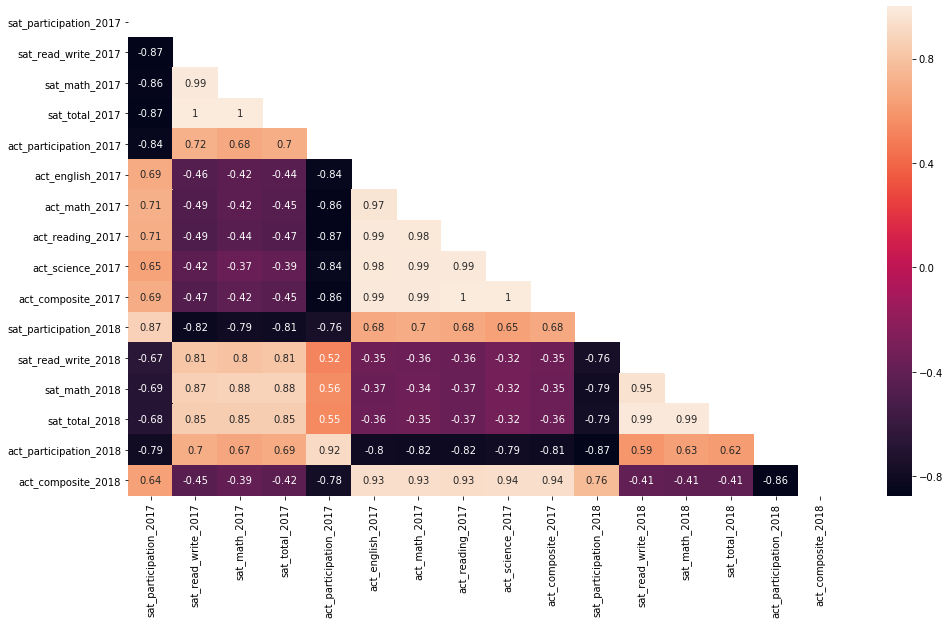

In [56]:
plt.figure(figsize=(16,9))

corr = final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, mask=mask, annot=True, color='k');


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [57]:
final.columns

Index(['state', 'sat_participation_2017', 'sat_read_write_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_2018',
       'sat_read_write_2018', 'sat_math_2018', 'sat_total_2018',
       'act_participation_2018', 'act_composite_2018'],
      dtype='object')

In [58]:
test_column_list = ['state', 'sat_participation_2017', 'sat_read_write_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_2018',
       'sat_read_write_2018', 'sat_math_2018', 'sat_total_2018',
       'act_participation_2018', 'act_composite_2018']

In [59]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [ ]:
subplot_histograms(df, ['survived'], ['the people who survived'], ['survival 1 0'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

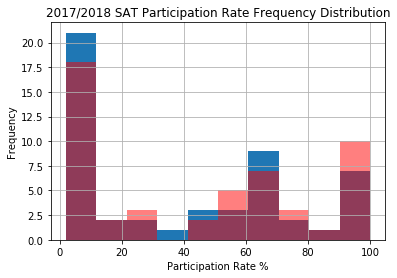

In [99]:
# Code

final['sat_participation_2017'].hist(alpha=1);
final['sat_participation_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Participation Rate %');
plt.ylabel('Frequency');
plt.title('2017/2018 SAT Participation Rate Frequency Distribution');

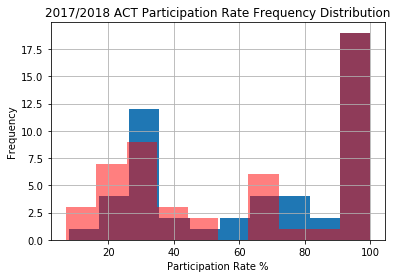

In [61]:
final['act_participation_2017'].hist(alpha=1);
final['act_participation_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Participation Rate %');
plt.ylabel('Frequency');
plt.title('2017/2018 ACT Participation Rate Frequency Distribution');

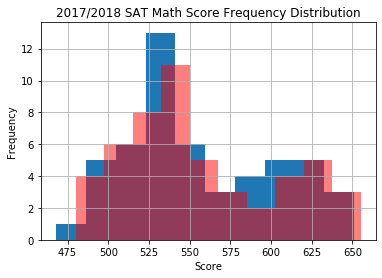

In [62]:
final['sat_math_2017'].hist(alpha=1);
final['sat_math_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Score');
plt.ylabel('Frequency');
plt.title('2017/2018 SAT Math Score Frequency Distribution');

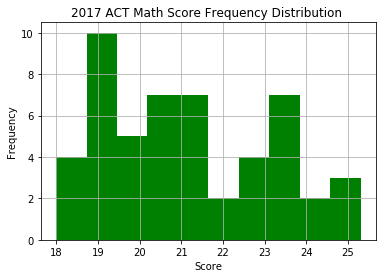

In [63]:
final['act_math_2017'].hist(alpha=1, color='green');
# final['act_math_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Score');
plt.ylabel('Frequency');
plt.title('2017 ACT Math Score Frequency Distribution ');

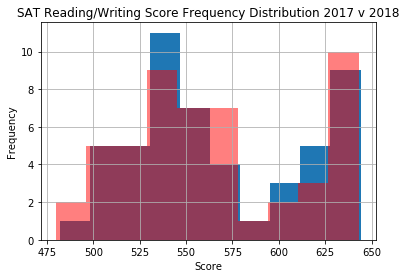

In [64]:
final['sat_read_write_2017'].hist(alpha=1);
final['sat_read_write_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Score');
plt.ylabel('Frequency');
plt.title('SAT Reading/Writing Score Frequency Distribution 2017 v 2018');

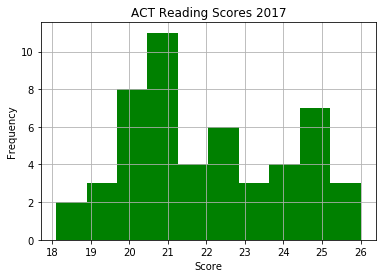

In [65]:
final['act_reading_2017'].hist(alpha=1, color='green');
# final['act_math_2018'].hist(alpha=0.5, color='r');
plt.xlabel('Score');
plt.ylabel('Frequency');
plt.title('ACT Reading Scores 2017');

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


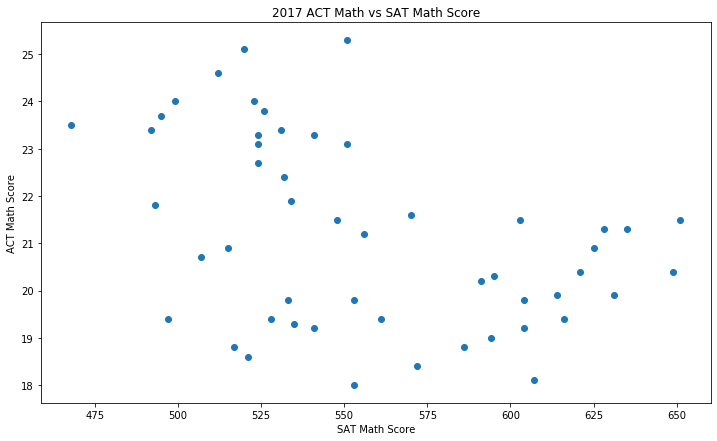

In [66]:
plt.figure(figsize = (12, 7))
plt.scatter(final['sat_math_2017'],final['act_math_2017']);
plt.xlabel('SAT Math Score');
plt.ylabel('ACT Math Score');
plt.title('2017 ACT Math vs SAT Math Score');

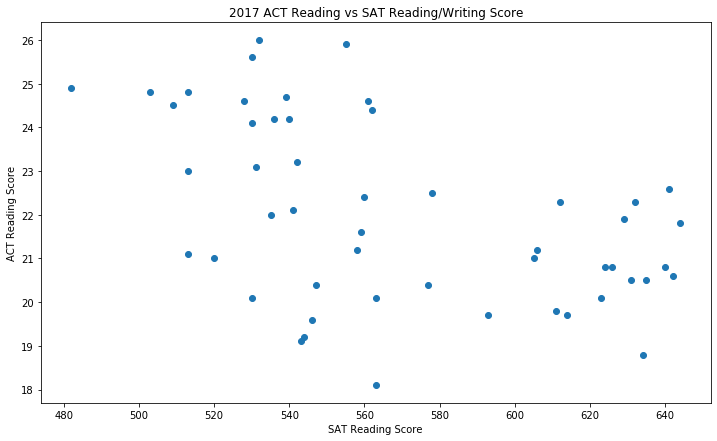

In [67]:
plt.figure(figsize = (12, 7))
plt.scatter(final['sat_read_write_2017'],final['act_reading_2017']);
plt.xlabel('SAT Reading Score');
plt.ylabel('ACT Reading Score');
plt.title('2017 ACT Reading vs SAT Reading/Writing Score');

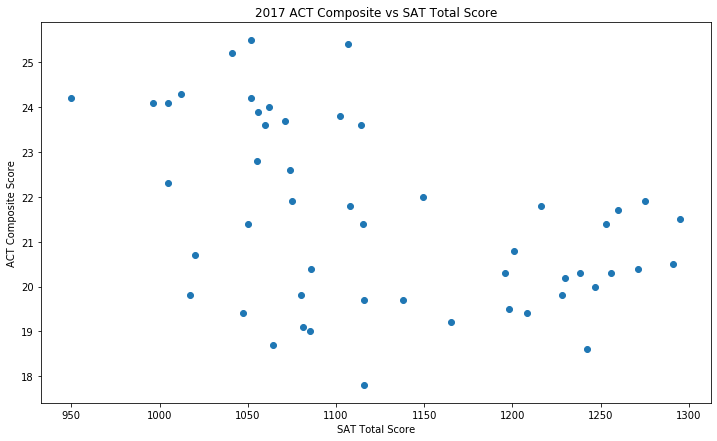

In [68]:
plt.figure(figsize = (12, 7))
plt.scatter(final['sat_total_2017'],final['act_composite_2017']);
plt.xlabel('SAT Total Score');
plt.ylabel('ACT Composite Score');
plt.title('2017 ACT Composite vs SAT Total Score');

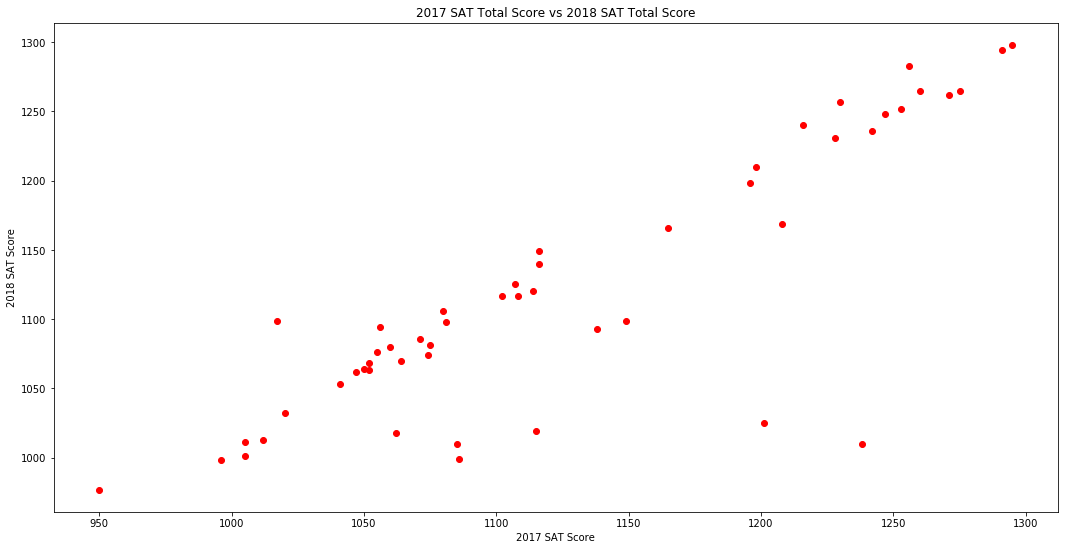

In [69]:
plt.figure(figsize = (18, 9))
plt.scatter(final['sat_total_2017'],final['sat_total_2018'], color='red');
# plt.scatter(final['sat_total_2018'],final['state']);
plt.xlabel('2017 SAT Score');
plt.ylabel('2018 SAT Score');
plt.title('2017 SAT Total Score vs 2018 SAT Total Score');

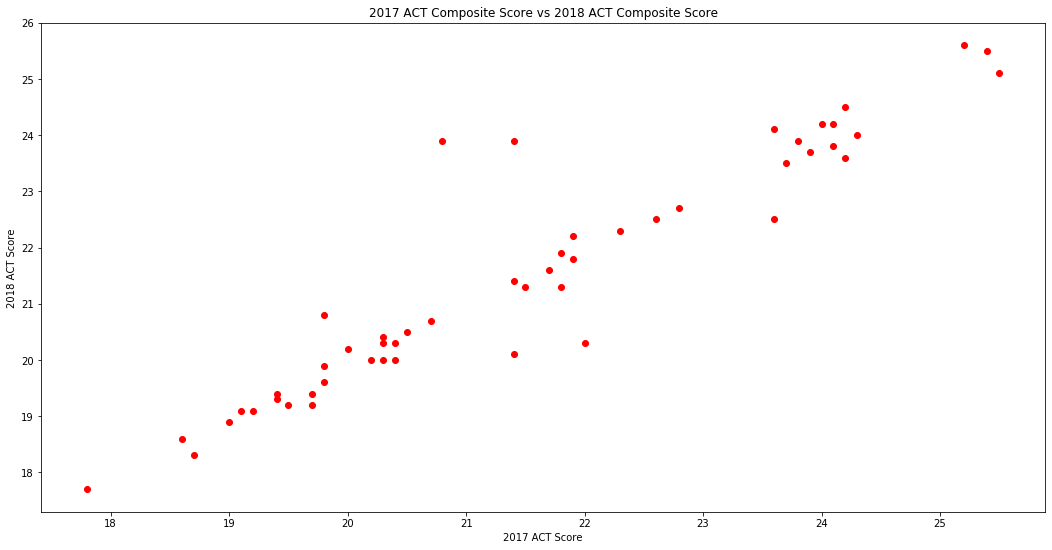

In [70]:
plt.figure(figsize = (18, 9))
plt.scatter(final['act_composite_2017'],final['act_composite_2018'], color='red');
# plt.scatter(final['sat_total_2018'],final['state']);
plt.xlabel('2017 ACT Score');
plt.ylabel('2018 ACT Score');
plt.title('2017 ACT Composite Score vs 2018 ACT Composite Score');

In [71]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

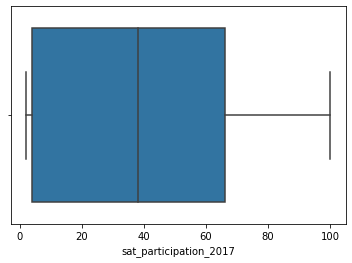

In [98]:
# Code
sns.boxplot(final['sat_participation_2017']);



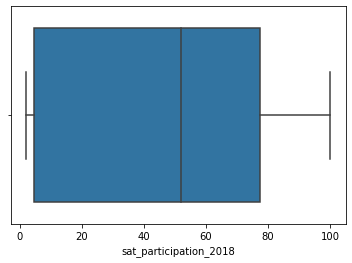

In [73]:
sns.boxplot(final['sat_participation_2018']);

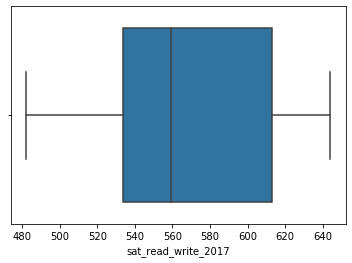

In [76]:
sns.boxplot(final['sat_read_write_2017']);

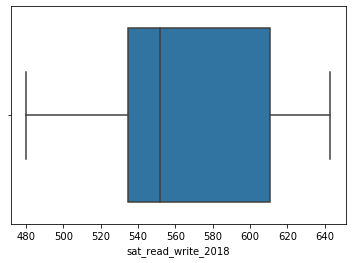

In [77]:
sns.boxplot(final['sat_read_write_2018']);

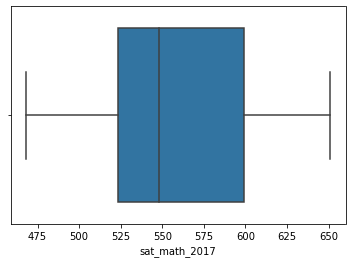

In [78]:
sns.boxplot(final['sat_math_2017']);

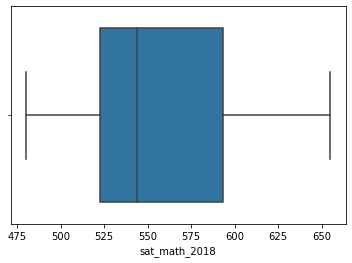

In [79]:
sns.boxplot(final['sat_math_2018']);

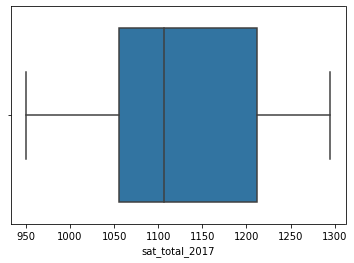

In [81]:
sns.boxplot(final['sat_total_2017']);

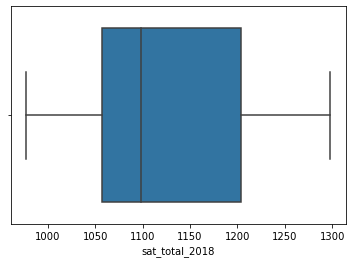

In [82]:
sns.boxplot(final['sat_total_2018']);

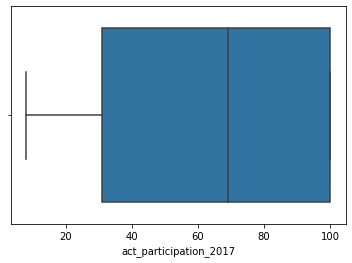

In [84]:
sns.boxplot(final['act_participation_2017']);

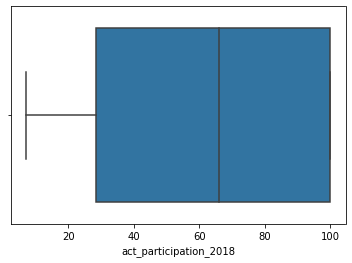

In [85]:
sns.boxplot(final['act_participation_2018']);

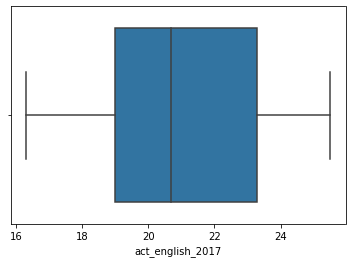

In [86]:
sns.boxplot(final['act_english_2017']);

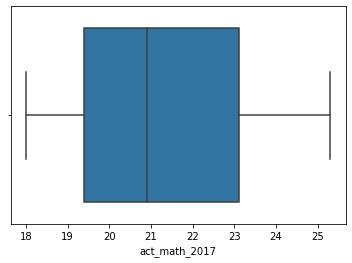

In [87]:
sns.boxplot(final['act_math_2017']);

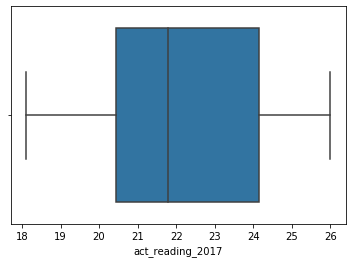

In [88]:
sns.boxplot(final['act_reading_2017']);

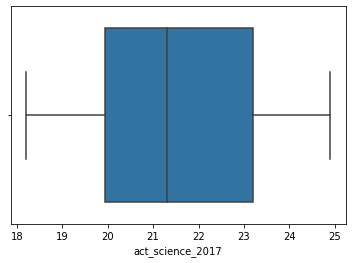

In [89]:
sns.boxplot(final['act_science_2017']);

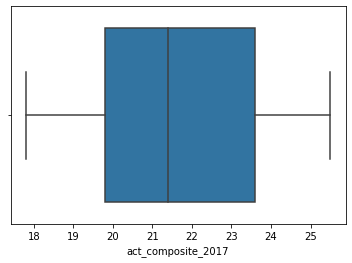

In [90]:
sns.boxplot(final['act_composite_2017']);

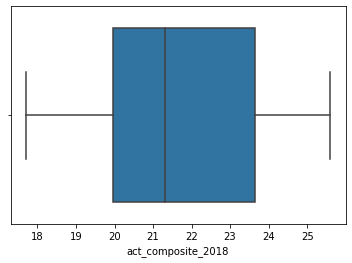

In [92]:
sns.boxplot(final['act_composite_2018']);

#### (Optional Assignment for Self): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado
- Massive spike in SAT participation (11% to 100%)
- This dropped the total score 1201 to 1025 as a result
- The reason being behind this is twofold:
    - Colorado mandated taking the SAT for graduation, forcing participation
    - As a result, with more of the populace taking it, the score average went down as our population increased dramatically.
    - Optional test takers likely studied for it and so were better prepared, driving the score up.

Illinois
- 9% to 99% in SAT
- This dropped the total score 1115 to 1019 as a result
- The reason being behind this is twofold:
    - Illinois (like Colorado) mandated taking the SAT for graduation, forcing participation
    - As a result, with more of the populace taking it, the score average went down as our population increased dramatically.
    - Optional test takers likely studied for it and so were better prepared, driving the score up.
    
    
Florida
- 73% to 66% participation in ACT (2017 to 2018)
    - ACT Composite scores only changed from 19.8 to 19.9 as a result
- 83% to 56% participation in SAT (2017 to 2018)
    - SAT Total scores changed from 1017 to 1099
- Florida does not require the ACT or SAT tests, they instead require only an exit exam from their high schools. (FSA - Florida Assessment Standards)
- SATs required students to take the test on Saturdays, made their families responsible for getting them to/from there, and required a payment fee of $47.50



## Conclusions and Recommendations

Whether you’re an ACT or SAT spokesperson, the greatest possible method to increase participation in a given state is to lobby to have your target state MANDATE your test as a requirement of graduation. This has the strongest effect in raising participation over all other methods.

# Recommendation(s):

- If you want your particular test participation in a state to go up (whether it's SAT/ACT), get the state to require your particular test (see: IL, CO)
- If you're Florida, don't make it so tests are on the weekends & cost money
